# 617.合并二叉树
输入：给定两个二叉树  
要求：将两个二叉树合并，如果对应位置的两个节点重叠，新节点的值为两个原节点的和  
输出：合并后的二叉树

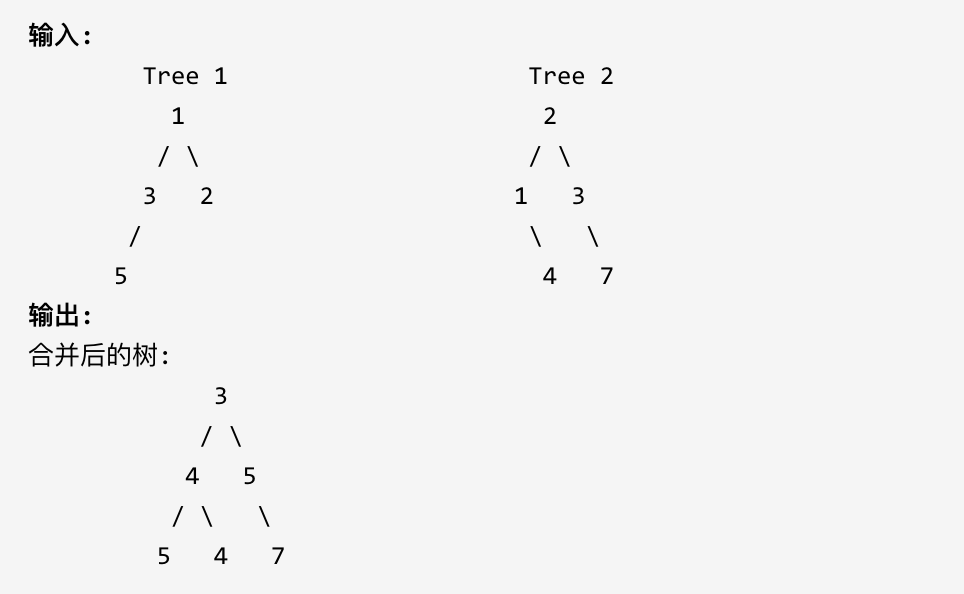

## 思路  
本题使用哪种遍历方式都可以  
操作两棵二叉树的思路在 对称二叉树 中也有涉及  

### 迭代 
层序遍历，用队列模拟  
- 每次把两棵树对应位置的节点同时加入队列进行比较

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None) -> None:
        self.val = val
        self.left = left
        self.right = right

# 迭代法，队列模拟
# 合并后的树以root1为基准
# 每次更新节点，先把节点2的值加到1上
# 当1缺乏左（右）节点时，如果节点2有左（右）节点，就把1的对应指针赋值为2的左（右）孩子
# 以1为基准，当前节点1有左孩子，而2没有左孩子时无需处理，因为1本身的左孩子就是满足要求的
# 体会 ！！嫁接！！的思想！！
from collections import deque

class Solution:
    def mergeTrees(self, root1:TreeNode, root2:TreeNode) -> TreeNode:
        if not root1:
            return root1
        if not root2:
            return root2
        
        queue = deque()
        # queue.append(root1)
        # queue.append(root2)
        queue.append((root1, root2))

        while queue:
            # node1 = queue.popleft()
            # node2 = queue.popleft()
            node1, node2 = queue.popleft()
            node1.val += node2.val

            # 更新队列queue（队列中只存放成对的节点元素）
            # 只有两个节点都有左右节点时，才入队
            if node1.left and node2.left:
                queue.append((node1.left, node2.left))
            elif not node1.left:
                node1.left = node2.left   # root1左孩子缺失，直接嫁接 2的左孩子
            
            if node1.right and node2.right:
                queue.append((node1.right, node2.right))
            elif not node1.right:
                node1.right = node2.right
        
        return root1

### 递归
递归遍历使用前中后序都可以  

1. 递归参数和返回值  
   - 参数：两棵树的根节点  
   - 返回值：合并后新树的根节点  

2. 终止条件：  
   - 当1遍历到空节点的时候，新节点即为2  
   - 当2遍历到空节点的时候，新节点即为1  

3. 单层递归逻辑：  
   - 在1树的基础上进行修改  
   - 每次把两个当前结点的值先求和  
   - 然后递归更新左右子树  
     - 合并后当前节点的左子树是1的左子树合并2的左子树后新子树的左子树  
     - 右同理

In [ ]:
# 递归，前序遍历,修改root1
# ⚠️ 注意: 本题我们重复使用了题目给出的节点而不是创建新节点. 节省时间, 空间. 

class mergeTrees(self, root1: TreeNode, root2: TreeNode) -> TreeNode:
    # 终止条件
    # 但凡有一个节点为空，另外一个如果也为空就说明遍历完了，直接返回none
    if not root1:
        return root2
    if not root2:
        return root1
    
    # 单层递归逻辑,按照前序遍历的：中左右
    # 通过终止条件筛选后，到这里两个子树都非空
    root1.val += root2.val
    root1.left = mergeTrees(root1.left, root2.left)
    root1.right = mergeTrees(root1.right, root2.right)

    return root1